# **DataSouth**

## **Cargar paquetes**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


## **Cargar el dataset**

In [ ]:
df_original = pd.read_csv("Data/airbnb-listings.csv",  sep=';')

Mounted at /content/drive


## **Diseño del dataset: filtros iniciales y limpieza de datos**

### **Columnas de interés**

In [ ]:
# Elegir las columnas de interés
df = df_original[['ID', 'Neighbourhood Group Cleansed','City','Latitude','Longitude','Zipcode','Property Type','Room Type','Bed Type','Beds','Bedrooms','Bathrooms','Accommodates','Amenities','Price','Security Deposit','Cleaning Fee','Cancellation Policy','Review Scores Rating','Market']]
df.head()

,ID,Neighbourhood Group Cleansed,City,Latitude,Longitude,Zipcode,Property Type,Room Type,Bed Type,Beds,Bedrooms,Bathrooms,Accommodates,Amenities,Price,Security Deposit,Cleaning Fee,Cancellation Policy,Review Scores Rating,Market
0,15141125,Centro,Madrid,40.407453,-3.707995,28005,Loft,Entire home/apt,Real Bed,1.0,0.0,1.0,2,"TV,Internet,Wireless Internet,Kitchen,Pets all...",50.0,100.0,20.0,moderate,96.0,Madrid
1,9470166,Centro,Madrid,40.408316,-3.705006,28012,Apartment,Entire home/apt,Real Bed,2.0,1.0,1.0,4,"TV,Internet,Wireless Internet,Air conditioning...",50.0,250.0,15.0,strict,81.0,Madrid
2,17444981,Centro,Madrid,40.413722,-3.706823,28012,Apartment,Entire home/apt,Real Bed,2.0,1.0,1.5,4,"TV,Internet,Wireless Internet,Air conditioning...",77.0,NaN,25.0,moderate,89.0,Madrid
3,3284565,Centro,Madrid,40.411263,-3.697305,28012,Apartment,Entire home/apt,Real Bed,2.0,1.0,1.0,2,"TV,Cable TV,Internet,Wireless Internet,Air con...",50.0,200.0,25.0,strict,93.0,Madrid
4,499911,Centro,Madrid,40.412556,-3.701155,28012,Apartment,Entire home/apt,Real Bed,4.0,2.0,1.0,5,"TV,Internet,Wireless Internet,Air conditioning...",95.0,200.0,60.0,strict,97.0,Madrid


### **Filtro por ciudad: Madrid**

In [ ]:
# Ver las distintas denominaciones
pd.unique(df['Market'])

array(['Madrid', 'London', 'Los Angeles', 'New Orleans',
       'Mallorca Island', 'Manchester', nan, 'Amsterdam', 'Barcelona',
       'Berlin', 'Dublin', 'Brussels', 'Copenhagen', 'Edinburgh',
       'Austin', 'Antwerp', 'Chicago', 'New York', 'Paris', 'Toronto',
       'Seattle', 'Sydney', 'Vienna', 'Venice', 'D.C.', 'Toledo',
       'Melbourne', 'Hong Kong', 'Rome', 'Malibu',
       'Other (International)', 'Geneva', 'Denver', 'Montreal',
       'Byron Bay', 'San Diego', 'San Francisco', 'Nashville',
       'Vancouver', 'Santiago', 'Boston', 'Athens', 'Deauville',
       'East Bay, CA'], dtype=object)

In [ ]:
# Filtrar por la ciudad de interés: Madrid
df = df.loc[df_original['Market']=='Madrid']

### **Filtro por tipo de propiedad**

In [ ]:
# Contabilizar las propiedades de cada tipo
df['Property Type'].value_counts()

Apartment             10915
House                  1001
Condominium             344
Bed & Breakfast         340
Loft                    284
Other                   220
Dorm                     44
Guesthouse               39
Chalet                   24
Hostel                   16
Serviced apartment       13
Townhouse                 9
Boutique hotel            6
Villa                     4
Guest suite               3
Casa particular           3
Earth House               3
Camper/RV                 2
Tent                      1
Boat                      1
Bungalow                  1
Timeshare                 1
Name: Property Type, dtype: int64

In [ ]:
# Filtrar por el tipo de propiedad: Apartment
df = df.loc[df['Property Type'] =='Apartment']

### **Filtro por tipo de régimen de alojamiento**

In [ ]:
# Contabilizar cada tipo de régimen de alojamiento
df['Room Type'].value_counts()

Entire home/apt    6973
Private room       3823
Shared room         119
Name: Room Type, dtype: int64

In [ ]:
df = df.loc[(df['Room Type']=='Entire home/apt') | (df['Room Type']=='Private room')]

### **Gestión de nulos**

In [ ]:
# Obtener el número de nulos de cada columna 
df.isna().sum()[df.isna().sum() > 0]

City                       6
Zipcode                  324
Beds                      27
Bedrooms                  13
Bathrooms                 37
Amenities                100
Price                      5
Security Deposit        5961
Cleaning Fee            4110
Review Scores Rating    2245
dtype: int64

In [ ]:
# Establecer a 0 los nulos de 'Security Deposit' y 'Cleaning Fee'
# Establecer a '' los nulos de 'Amenities'
df['Security Deposit'] = df['Security Deposit'].fillna(0)
df['Cleaning Fee'] = df['Cleaning Fee'].fillna(0)
df['Amenities'] = df['Amenities'].fillna('')

In [ ]:
# Eliminar el resto de filas que contengan valores nulos
df.dropna(inplace=True)

In [ ]:
# Comprobar que no hay valores nulos ya
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

### **Cambio de unidades monetarias**

In [ ]:
# Transformar de dólar a euro las columnas que lo necesitan
df['Price'] = round(df['Price'] * 0.85, 2)
df['Security Deposit'] = round(df['Security Deposit'] * 0.85, 2)
df['Cleaning Fee'] = round(df['Cleaning Fee'] * 0.85, 2)

### **Tratamiento de las Amenities**

In [ ]:
# Añadir columnas con las amenities de interés y rellnar con True o False según corresponda
df['Internet'] = df['Amenities'].str.contains('Internet')
df['TV'] = df['Amenities'].str.contains('TV')
df['Kitchen'] = df['Amenities'].str.contains('Kitchen')
df['Air conditioning'] = df['Amenities'].str.contains('Air conditioning')
df['Heating'] = df['Amenities'].str.contains('Heating')

### **Nombres de las columnas**

In [ ]:
# Reducir el nombre de la columna 'Neighbourhood Group Cleansed'
df = df.rename(columns={'Neighbourhood Group Cleansed':'Neighbourhood'})

In [ ]:
# Cambiar el nombre de las columnas quitando el espaciado
df.columns = df.columns.str.replace(' ', '')

In [ ]:
# Cambiar los valores de 'ReviewScoresRating' a enteros
df['ReviewScoresRating'] = df['ReviewScoresRating'].astype(int)

In [ ]:
# Comprobar los nombres
df.columns

Index(['ID', 'Neighbourhood', 'City', 'Latitude', 'Longitude', 'Zipcode',
       'PropertyType', 'RoomType', 'BedType', 'Beds', 'Bedrooms', 'Bathrooms',
       'Accommodates', 'Amenities', 'Price', 'SecurityDeposit', 'CleaningFee',
       'CancellationPolicy', 'ReviewScoresRating', 'Market', 'Internet', 'TV',
       'Kitchen', 'Airconditioning', 'Heating'],
      dtype='object')

### **Dataset resultante**

In [ ]:
df.head()

,ID,Neighbourhood,City,Latitude,Longitude,Zipcode,PropertyType,RoomType,BedType,Beds,...,SecurityDeposit,CleaningFee,CancellationPolicy,ReviewScoresRating,Market,Internet,TV,Kitchen,Airconditioning,Heating
1,9470166,Centro,Madrid,40.408316,-3.705006,28012,Apartment,Entire home/apt,Real Bed,2.0,...,212.5,12.75,strict,81,Madrid,True,True,True,True,True
2,17444981,Centro,Madrid,40.413722,-3.706823,28012,Apartment,Entire home/apt,Real Bed,2.0,...,0.0,21.25,moderate,89,Madrid,True,True,True,True,True
3,3284565,Centro,Madrid,40.411263,-3.697305,28012,Apartment,Entire home/apt,Real Bed,2.0,...,170.0,21.25,strict,93,Madrid,True,True,True,True,True
4,499911,Centro,Madrid,40.412556,-3.701155,28012,Apartment,Entire home/apt,Real Bed,4.0,...,170.0,51.00,strict,97,Madrid,True,True,True,True,True
5,1346747,Centro,Madrid,40.407908,-3.705095,28005,Apartment,Entire home/apt,Real Bed,2.0,...,102.0,21.25,moderate,91,Madrid,True,False,True,True,True


## **Detección y tratamiento de los outliers**

### **Histogramas**

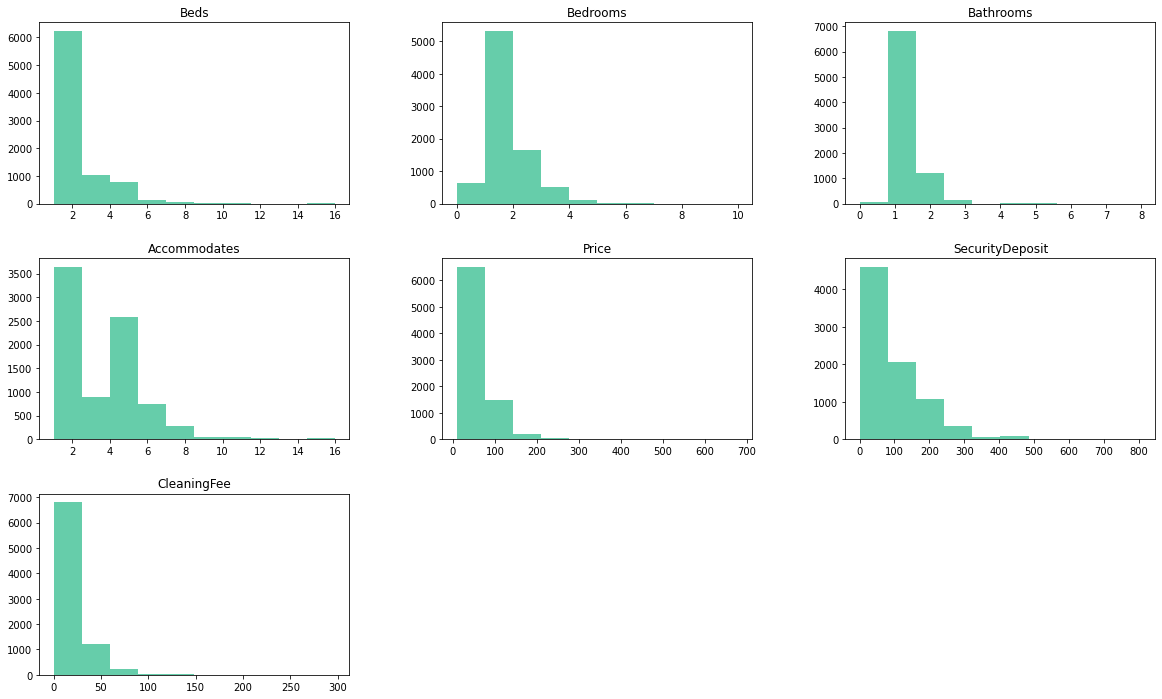

In [ ]:
# Gráficas de algunos parámetros
histogram = df[['Beds','Bedrooms','Bathrooms','Accommodates','Price','SecurityDeposit','CleaningFee']].hist(figsize=(20,12), grid = False, color = '#66CDAA') 

### **Calcular los outliers de 'Price'**

In [ ]:
# Ver los parámetros estadísticos originales
df['Price'].describe()

count    8293.000000
mean       56.912999
std        42.664988
min         8.500000
25%        29.750000
50%        49.300000
75%        68.000000
max       680.000000
Name: Price, dtype: float64

In [ ]:
# Cálculos para detectar los outliers
Q1_Price = df['Price'].quantile(0.25)
Q3_Price = df['Price'].quantile(0.75)
IQR_Price = Q3_Price - Q1_Price

lim_inf_Price = Q1_Price - 1.5 *IQR_Price
lim_sup_Price = Q3_Price + 1.5 *IQR_Price

outliers_inf_Price = (df['Price'] < lim_inf_Price)
outliers_sup_Price = (df['Price'] > lim_sup_Price)

In [ ]:
# Dataset sin los outliers de 'Price'
df_outliers1 = df[~ (outliers_inf_Price | outliers_sup_Price)]

In [ ]:
# Ver los parámetros estadísticos después de quitar los outliers
df_outliers1['Price'].describe()

count    7827.000000
mean       49.547713
std        25.083878
min         8.500000
25%        29.750000
50%        46.750000
75%        64.600000
max       123.250000
Name: Price, dtype: float64

### **Calcular los outliers de 'SecurityDeposit'**

In [ ]:
# Ver los parámetros estadísticos originales
df['SecurityDeposit'].describe()

count    8293.000000
mean       71.579163
std        95.252490
min         0.000000
25%         0.000000
50%         0.000000
75%       127.500000
max       807.500000
Name: SecurityDeposit, dtype: float64

In [ ]:
# Cálculos para detectar los outliers
Q1_SecDep = df['SecurityDeposit'].quantile(0.25)
Q3_SecDep = df['SecurityDeposit'].quantile(0.75)
IQR_SecDep = Q3_SecDep - Q1_SecDep

lim_inf_SecDep = Q1_SecDep - 1.5 *IQR_SecDep
lim_sup_SecDep = Q3_SecDep + 1.5 *IQR_SecDep

outliers_inf_SecDep = (df['SecurityDeposit'] < lim_inf_SecDep)
outliers_sup_SecDep = (df['SecurityDeposit'] > lim_sup_SecDep)

In [ ]:
# Dataset sin los outliers de 'SecurityDeposit'
df_outliers2 = df_outliers1[~ (outliers_inf_SecDep | outliers_sup_SecDep)]

<ipython-input-76-073ff6e87563>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_outliers2 = df_outliers1[~ (outliers_inf_SecDep | outliers_sup_SecDep)]


In [ ]:
# Ver los parámetros estadísticos después de quitar los outliers
df_outliers2['SecurityDeposit'].describe()

count    7701.000000
mean       60.857616
std        76.285931
min         0.000000
25%         0.000000
50%         0.000000
75%       127.500000
max       310.250000
Name: SecurityDeposit, dtype: float64

### **Calcular los outliers de 'CleaningFee'**

In [ ]:
# Ver los parámetros estadísticos originales
df['CleaningFee'].describe()

count    8293.000000
mean       16.175112
std        19.177187
min         0.000000
25%         0.000000
50%        12.750000
75%        25.500000
max       297.500000
Name: CleaningFee, dtype: float64

In [ ]:
# Cálculos para detectar los outliers
Q1_CleaningFee = df['CleaningFee'].quantile(0.25)
Q3_CleaningFee = df['CleaningFee'].quantile(0.75)
IQR_CleaningFee = Q3_CleaningFee - Q1_CleaningFee

lim_inf_CleaningFee = Q1_CleaningFee - 1.5 *IQR_CleaningFee
lim_sup_CleaningFee = Q3_CleaningFee + 1.5 *IQR_CleaningFee

outliers_inf_CleaningFee = (df['CleaningFee'] < lim_inf_CleaningFee)
outliers_sup_CleaningFee = (df['CleaningFee'] > lim_sup_CleaningFee)

In [ ]:
# Dataset sin los outliers de 'CleaningFee'
df_outliers3 = df_outliers2[~ (outliers_inf_CleaningFee | outliers_sup_CleaningFee)]

<ipython-input-80-ca31bba59314>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_outliers3 = df_outliers2[~ (outliers_inf_CleaningFee | outliers_sup_CleaningFee)]


In [ ]:
# Ver los parámetros estadísticos después de quitar los outliers
df_outliers3['CleaningFee'].describe()

count    7645.000000
mean       13.630687
std        13.608122
min         0.000000
25%         0.000000
50%        12.750000
75%        25.500000
max        63.750000
Name: CleaningFee, dtype: float64

### **Boxplots**

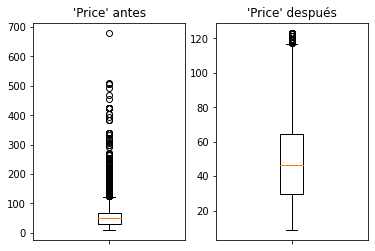

In [ ]:
# Comparar 'Price' antes y después de quitar los outliers
fig, ax = plt.subplots(1,2)
ax[0].set_title("'Price' antes")
ax[0].boxplot(df['Price'])
ax[1].set_title("'Price' después")
ax[1].boxplot(df_outliers1['Price'])
ax[0].set_xticklabels('')
ax[1].set_xticklabels('')
plt.show()

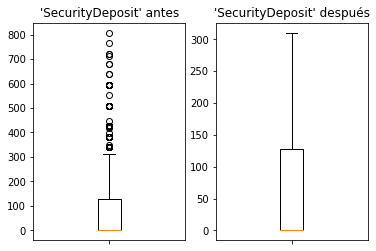

In [ ]:
# Comparar 'SecurityDeposit' antes y después de quitar los outliers
fig, ax = plt.subplots(1,2)
ax[0].set_title("'SecurityDeposit' antes")
ax[0].boxplot(df['SecurityDeposit'])
ax[1].set_title("'SecurityDeposit' después")
ax[1].boxplot(df_outliers2['SecurityDeposit'])
ax[0].set_xticklabels('')
ax[1].set_xticklabels('')
plt.show()

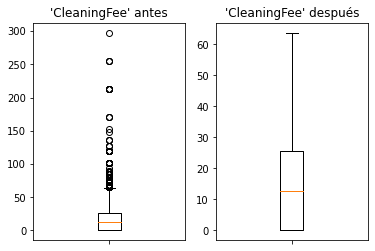

In [ ]:
# Comparar 'CleaningFee' antes y después de quitar los outliers
fig, ax = plt.subplots(1,2)
ax[0].set_title("'CleaningFee' antes")
ax[0].boxplot(df['CleaningFee'])
ax[1].set_title("'CleaningFee' después")
ax[1].boxplot(df_outliers3['CleaningFee'])
ax[0].set_xticklabels('')
ax[1].set_xticklabels('')
plt.show()

### **Histogramas sin outliers**

In [ ]:
# Dataset sin outliers
df_out = df_outliers3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9f94fd910>,
      dtype=object)

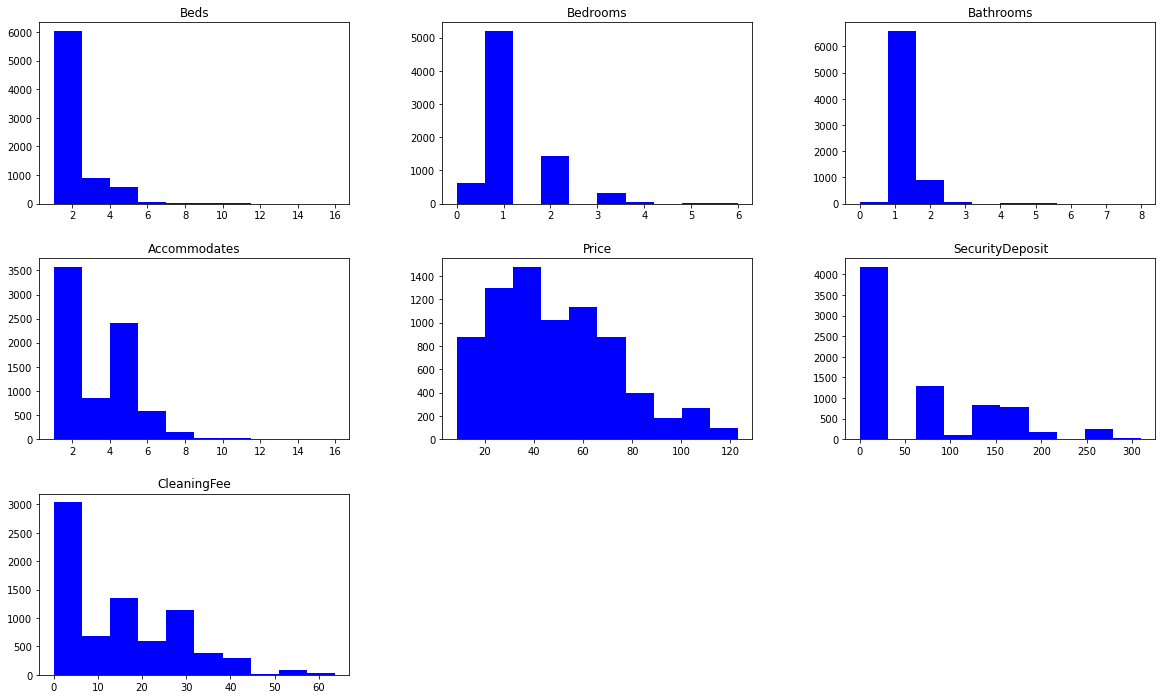

In [ ]:
# Gráficas de algunos parámetros tras eliminar los outliers
df_out[['Beds','Bedrooms','Bathrooms','Accommodates','Price','SecurityDeposit','CleaningFee']].hist(figsize=(20,12), grid = False, color = '#0000FF')

## **Guardar el dataframe como .csv para *Tableau***

In [ ]:
# Exportar dataframe en un archivo .csv nuevo
df_out.to_csv('Data/DataSouth_Tableau.csv', index = False, sep=';')

## **Filtros adicionales**

### **Filtro por código postal**

In [ ]:
# Ver los distintos códigos postales que hay
df['Zipcode'].unique()

array(['28012', '28005', '28013', '28004', '28015', '2015', '28045',
       '28007', '28009', '28014', '28001', '28006', '28028', '28002',
       '28016', '28036', '28020', '28060', '28003', '28029', '28046',
       '28027', '28043', '28033', '28050', '28010', '28034', '28035',
       '28008', '28021', '28042', '28011', '28047', '28019', '28024',
       '28041', '28026', '28038', '28053', '28017', '28039', '28025',
       '28044', '28030', '28037', '28022', '2804', '28040', '28018',
       '28031', '28032', '20126', '28051', 'Madrid 28004', '28055',
       '2802\n28012', '28049', '28023', '28224', '280013', '28094',
       '28002\n28002', '28054', '28', '28056', '2805', '28051\n28051'],
      dtype=object)

In [ ]:
# Crear una RegEx para comprobar 'Zipcode' para eliminar los que no cumplen la condición
# Condiciones RegEx: contiene un número de 5 dígitos entre 28001 y 28991
df = df[df['Zipcode'].str.contains(r'^[2][8][0-9]{3}$', regex=True)]

In [ ]:
# Comprobar que se han eliminado correctamente
df['Zipcode'].unique()

array(['28012', '28005', '28013', '28004', '28015', '28045', '28007',
       '28009', '28014', '28001', '28006', '28028', '28002', '28016',
       '28036', '28020', '28060', '28003', '28029', '28046', '28027',
       '28043', '28033', '28050', '28010', '28034', '28035', '28008',
       '28021', '28042', '28011', '28047', '28019', '28024', '28041',
       '28026', '28038', '28053', '28017', '28039', '28025', '28044',
       '28030', '28037', '28022', '28040', '28018', '28031', '28032',
       '28051', '28055', '28049', '28023', '28224', '28094', '28054',
       '28056'], dtype=object)

## **Guardar el dataframe como .csv para *RStudio***

In [ ]:
# Exportar dataframe en un archivo .csv nuevo
df_out.to_csv('Data/DataSouth_Rstudio.csv', index = False, sep=';')

## **Estudio de los datos**

### **Precio total medio por barrio para alojamiento completo**

In [ ]:
# Calcular el precio medio de cada barrio para un alojamiento completo
df[df['RoomType'] == 'Entire home/apt'].groupby('Neighbourhood')['Price'].mean().sort_values(ascending=False)

Neighbourhood
Barajas                  94.845833
Salamanca                93.806101
Retiro                   82.078443
Centro                   72.018369
Chamberí                 71.674812
Moncloa - Aravaca        71.652344
Fuencarral - El Pardo    70.266667
Chamartín                69.660156
Hortaleza                62.790323
Moratalaz                57.397368
Arganzuela               57.364718
Tetuán                   56.350000
San Blas - Canillejas    53.890000
Ciudad Lineal            51.671053
Vicálvaro                50.787500
Latina                   50.025610
Carabanchel              49.785714
Villa de Vallecas        47.730769
Usera                    47.245833
Villaverde               45.953125
Puente de Vallecas       43.283333
Name: Price, dtype: float64

### **Precio total medio por barrio para habitación privada**

In [ ]:
# Calcular el precio medio de cada barrio para una habitación privada
df[df['RoomType'] == 'Private room'].groupby('Neighbourhood')['Price'].mean().sort_values(ascending=False)

Neighbourhood
Centro                   29.390941
Chamberí                 28.708382
Chamartín                27.679839
Barajas                  25.995833
Tetuán                   25.942000
Moncloa - Aravaca        25.460465
Retiro                   25.316667
Hortaleza                24.233019
Arganzuela               24.077253
Salamanca                23.690782
Fuencarral - El Pardo    22.550000
Villa de Vallecas        21.250000
Ciudad Lineal            21.229762
San Blas - Canillejas    20.485000
Carabanchel              19.558416
Villaverde               18.293478
Puente de Vallecas       18.198361
Usera                    17.914151
Latina                   17.811069
Moratalaz                17.762069
Vicálvaro                15.300000
Name: Price, dtype: float64

### **Precio total medio (con la mediana) según el barrio**

In [ ]:
median_price_Neighbourhood = df_out.groupby('Neighbourhood')['Price'].agg('median').sort_values(ascending = False)

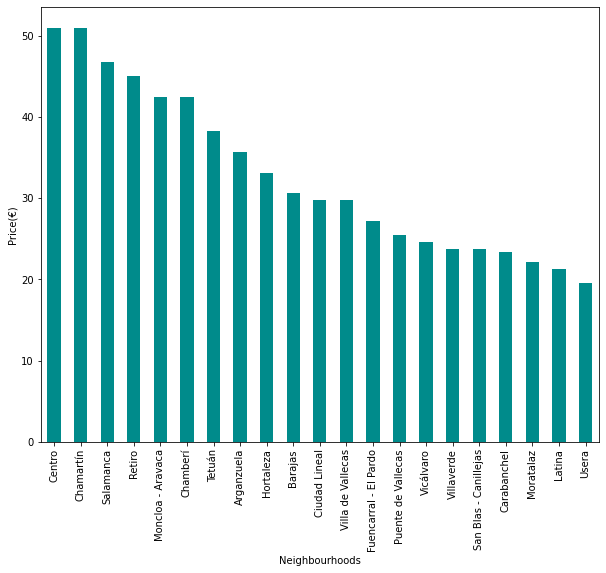

In [ ]:
# Gráfica de precios por barrio
median_price_Neighbourhood.plot(kind='bar', title="", figsize=(10,8), color='#008B8B')
plt.xlabel('Neighbourhoods')
plt.ylabel('Price(€)')
plt.show()

### **Precio total medio (con la mediana) por barrio según el régimen de alojamiento**

In [ ]:
median_price_RoomType = df.groupby('RoomType')['Price'].agg('median').sort_values(ascending = False)

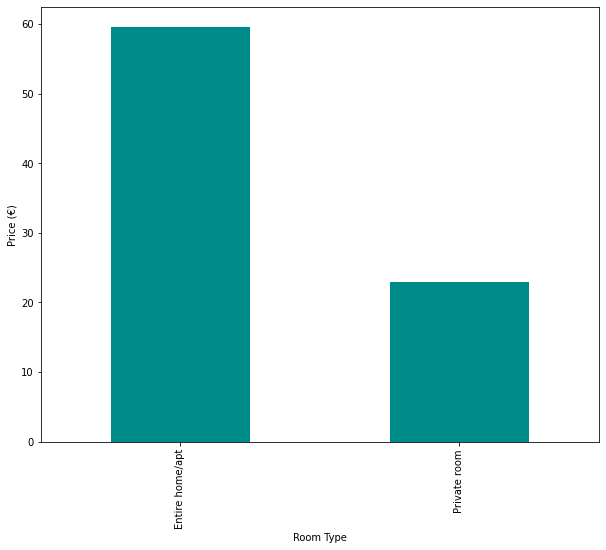

In [ ]:
# Gráfica de precios por tipo de régimen de alojamiento
median_price_RoomType.plot(kind='bar', title="", figsize=(10,8), color='#008B8B')
plt.xlabel('Room Type')
plt.ylabel('Price (€)')
plt.show()